# GRIP-The Spark Foundation
###  By- Arvind Kumar Patel

# Task 1 : Prediction Using Decision Tree Algorithm

# Step Followed

![title](pipeline3.png)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split


In [2]:
# loading dataset as iris
iris =pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# basic sanity check
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Size of dataset : 150 X 6 <br>
No null value found 

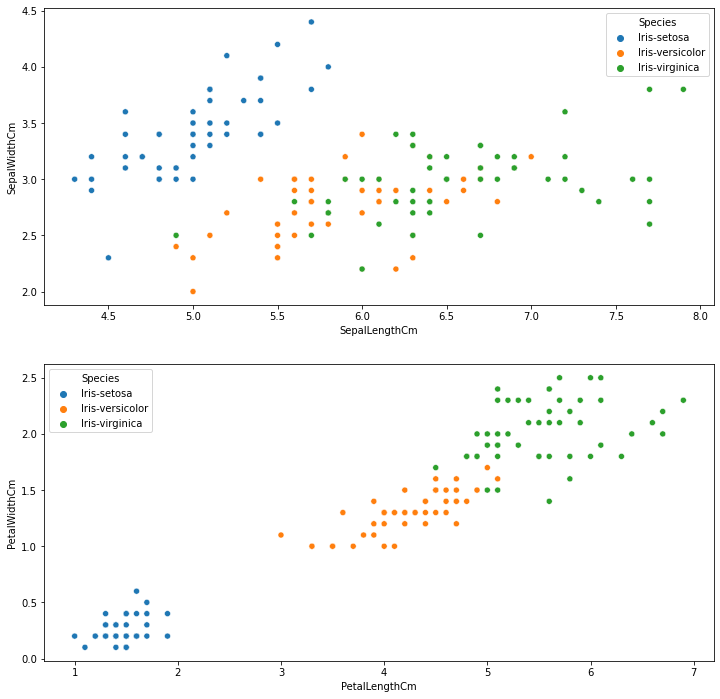

In [4]:
# Visualising dataset
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",hue="Species",data=iris)
plt.subplot(2,1,2)
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm",hue="Species",data=iris)
plt.show()

#### Insight 
We can see **petal** width and height can be good predcitor as there is low overlapping between different species <br>
With the help of **sepal**  width and height we can easily separate setosa from other two species but we cannot separate versicolor and virginia as their is so overlapping.



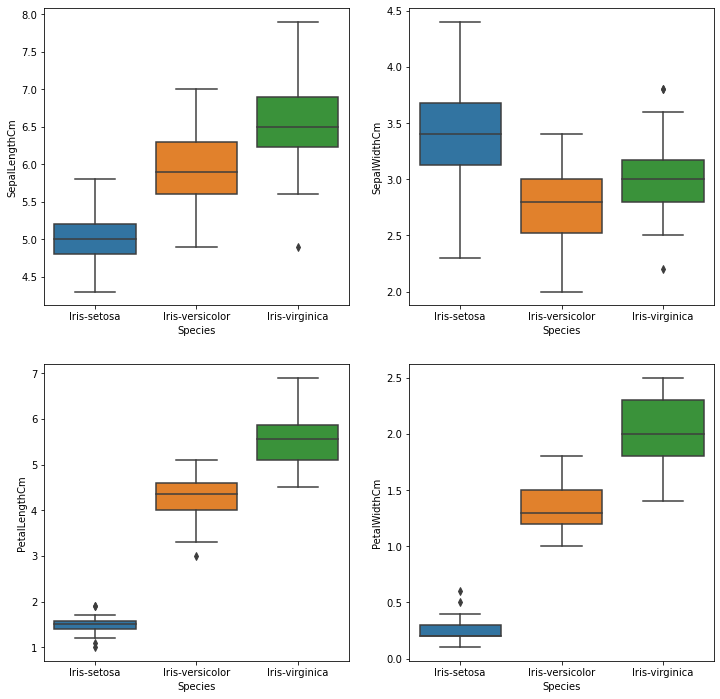

In [5]:
# checking outlier 
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.boxplot(y="SepalLengthCm",x="Species",data=iris)
plt.subplot(2,2,2)
sns.boxplot(y="SepalWidthCm",x="Species",data=iris)


plt.subplot(2,2,3)
sns.boxplot(y="PetalLengthCm",x="Species",data=iris)

plt.subplot(2,2,4)
sns.boxplot(y="PetalWidthCm",x="Species",data=iris)
plt.show()

In [6]:
# We can see some outliers but decision trees are immune to outliers

In [7]:
iris["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [8]:
# mapping species into setosa-1,2-versicolor,3-virginia
iris["Species"]=iris["Species"].map({"Iris-setosa":0.0,"Iris-versicolor":1.0,"Iris-virginica":2.0})

# Model Build and Model evaluation

In [9]:
iris=iris.set_index("Id")

In [10]:
# splitting data into train and test
X=iris.drop("Species",1)
y=iris["Species"]
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=120,stratify=y,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [12]:
y.head()

Id
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: Species, dtype: float64

In [13]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
46,4.8,3.0,1.4,0.3
2,4.9,3.0,1.4,0.2
39,4.4,3.0,1.3,0.2
8,5.0,3.4,1.5,0.2
83,5.8,2.7,3.9,1.2


In [14]:
y_train.head()

Id
46    0.0
2     0.0
39    0.0
8     0.0
83    1.0
Name: Species, dtype: float64

In [15]:
clf = tree.DecisionTreeClassifier()
clf= clf.fit(X_train, y_train)

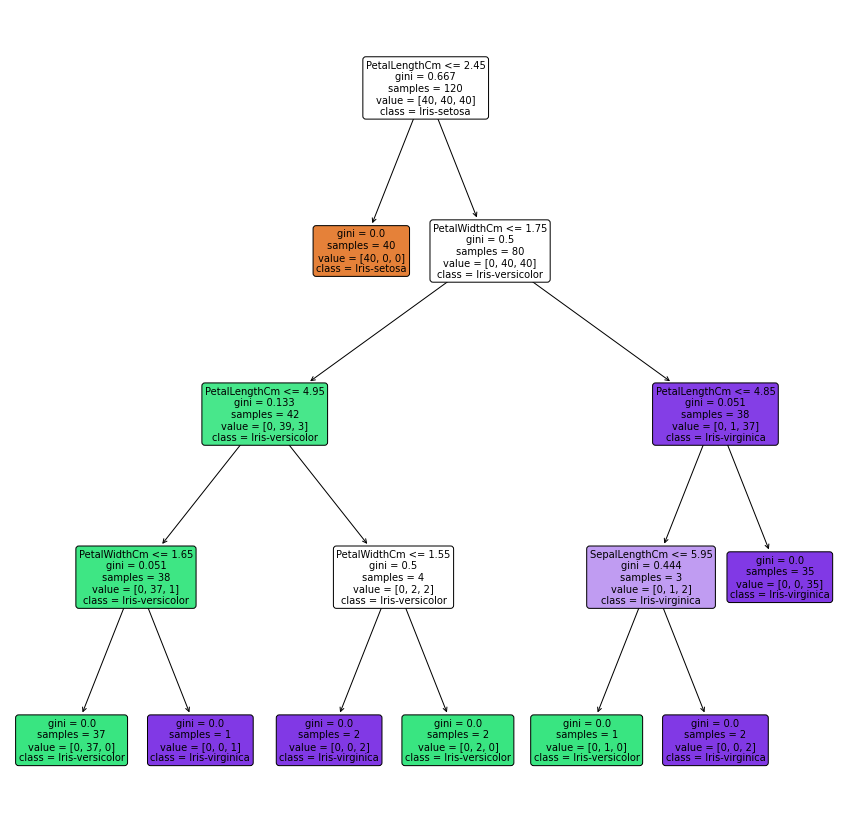

In [16]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf,feature_names=X_train.columns,class_names={0.0:"Iris-setosa",1.0:"Iris-versicolor",2.0:"Iris-virginica"}\
               ,label="all",filled=True,rounded=True)
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score

print(confusion_matrix(y_train,clf.predict(X_train)))
print(accuracy_score(y_train,clf.predict(X_train)))

[[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]
1.0


### checking on test data

In [18]:
print(confusion_matrix(y_test,clf.predict(X_test)))
print(accuracy_score(y_test,clf.predict(X_test)))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
0.9666666666666667


#### We can see that on test we r getting 96 acuracy.